# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Data Preview and Preprocessing

In [2]:
df = pd.read_csv(r"E:\Data Science\Projects\Real Estate Price Prediction\Dataset\estate-data.csv")

In [3]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [5]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [6]:
df.value_counts()

brokered_by  status    price     bed  bath  acre_lot  street     city              state      zip_code  house_size  prev_sold_date
110142.0     for_sale  174900.0  3.0  2.0   0.27      638983.0   Carthage          Texas      75633.0   1566.0      2016-11-29        1
0.0          for_sale  265000.0  4.0  3.0   0.22      296128.0   Savannah          Georgia    31419.0   1487.0      2006-07-11        1
                       279900.0  3.0  2.0   0.20      1623254.0  Savannah          Georgia    31419.0   1728.0      2009-04-06        1
             sold      179900.0  3.0  2.0   0.20      93274.0    Rincon            Georgia    31326.0   1100.0      2021-12-03        1
                       205000.0  2.0  2.0   0.03      458694.0   Savannah          Georgia    31419.0   1040.0      2022-02-09        1
                                                                                                                                     ..
2.0          sold      264900.0  2.0  2.0   0.24     

In [7]:
df.isna().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [8]:
df.drop(columns=['brokered_by', 'zip_code', 'prev_sold_date'], inplace=True)

In [9]:
df

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
4,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,NaN
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [10]:
df.isna()

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
2226377,False,False,False,False,False,False,False,False,False
2226378,False,False,False,False,False,False,False,False,False
2226379,False,False,False,False,False,False,False,False,False
2226380,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum().sum()

np.int64(1900983)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2226377    False
2226378    False
2226379    False
2226380    False
2226381    False
Length: 2222800, dtype: bool

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df['status'].value_counts()

status
for_sale          1386045
sold               811724
ready_to_build      25031
Name: count, dtype: int64

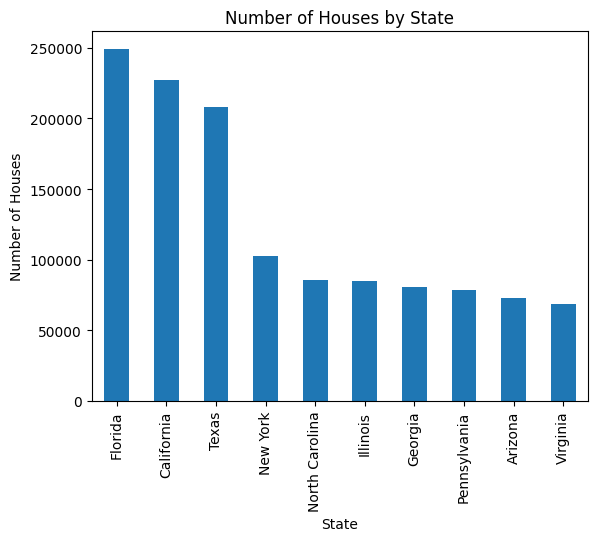

In [16]:
df['state'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Number of Houses by State')
plt.xlabel('State')
plt.ylabel('Number of Houses')
plt.show()

In [17]:
df.shape

(2222800, 9)

In [18]:
df

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
4,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,NaN
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [19]:
df.groupby('state')['price'].mean().sort_values(ascending=False).astype(int)

state
Hawaii                  1240261
California              1029303
New York                 943389
District of Columbia     882849
Utah                     881178
Colorado                 832672
Montana                  792473
Virgin Islands           759440
Massachusetts            724897
Guam                     713861
Nevada                   673738
Connecticut              667848
Idaho                    660890
Washington               659001
Puerto Rico              640685
Wyoming                  610669
Oregon                   586603
New Jersey               569934
Florida                  548471
Arizona                  485928
New Hampshire            481997
Rhode Island             481312
Virginia                 468714
Maryland                 456452
Vermont                  444875
Texas                    441438
Delaware                 433561
Georgia                  390635
South Carolina           387548
Tennessee                377309
Minnesota                366396
Ka

In [20]:
df.dropna(inplace=True)

In [21]:
df.groupby('city')['price'].mean().sort_values(ascending=False).dropna().astype(int)

city
International      2147483600
Bolingbroke          45250000
Bal Harbour          26585714
Gulf Stream          21461250
Woody Creek          20987500
                      ...    
Otter Rock              10033
Midwest                 10000
Center Junction          8500
Rowan                    7500
Pilot Mound              6500
Name: price, Length: 17114, dtype: int64

In [22]:
df.select_dtypes(include=['number']).corr()['price']

price         1.000000
bed           0.117585
bath          0.208868
acre_lot      0.005304
street        0.000481
house_size    0.073849
Name: price, dtype: float64

# Model Training and Testing

In [23]:
X = df[['bed', 'bath', 'house_size']]
y = df['price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape

(1084689, 3)

In [26]:
X_test.shape

(271173, 3)

In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_train

array([[-0.26419676, -1.11203511, -0.22567463],
       [ 1.10405117,  1.05055282,  0.45229573],
       [-0.26419676, -0.39117247, -0.2351237 ],
       ...,
       [-0.26419676, -0.39117247, -0.19050311],
       [ 0.41992721,  0.32969018,  0.27617567],
       [ 0.41992721,  1.05055282,  0.63051558]], shape=(1084689, 3))

In [30]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [31]:
X_test = scaler.fit_transform(X_test)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred =model.predict(X_test)

In [35]:
mean_er = mean_squared_error(y_test, y_pred)
mean_er

1052638926580.1777

In [36]:
r2 = r2_score(y_test, y_pred)

In [37]:
r2

0.1850458515422122

In [38]:
joblib.dump(model, 'model.pkl')

['model.pkl']